## **Chapter 4: CNN**
### **Ex2: Fashion_mnist**
- Cho dữ liệu fashion_mnist chứa 70.000 hình ảnh là các sản phẩm thời trang.
- Chia dữ liệu thành 2 bộ là train (60.000 hình) và test (10.000 hình ảnh)
- Áp dụng CNN để nhận biết hình ảnh số là sản phẩm nào
- Dựa vào summary của mô hình để tính số lượng tham số.
- Chú ý: nên dùng EarlyStopping, ModelCheckpoint để lưu lại model sau các lần thực thi để tránh khi bị ngắt đột ngột phải thực hiện lại từ đầu

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Model, Sequential
from tensorflow.keras.layers import Dense, Input

from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

In [3]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten
from tensorflow.keras.utils import to_categorical

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
%cd '/content/gdrive/My Drive/LDS8_K275_ONLINE_DinhVietTrung'

Mounted at /content/gdrive
/content/gdrive/My Drive/LDS8_K275_ONLINE_DinhVietTrung


In [6]:
print(tf.__version__)
print(keras.__version__)

2.8.2
2.8.0


In [7]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [8]:
test_images = X_test[:5]
test_types = y_test[:5]

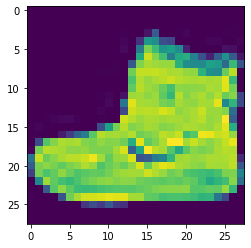

In [9]:
#plot the first image in the dataset
plt.imshow(X_train[0])

In [10]:
#check image shape
X_train[0].shape

(28, 28)

In [11]:
# Create dictionary of target classes
label_dict = {
  0: 'T-shirt/top',
  1: 'Trouser',
  2: 'Pullover',
  3: 'Dress',
  4: 'Coat',
  5: 'Sandal',
  6: 'Shirt',
  7: 'Sneaker',
  8: 'Bag',
  9: 'Ankle boot',
}

In [12]:
display(X_train.shape, X_test.shape)

(60000, 28, 28)

(10000, 28, 28)

In [13]:
#reshape data to fit model
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [14]:
y_train[:5]

array([9, 0, 0, 3, 0], dtype=uint8)

In [15]:
#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [16]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [17]:
from tensorflow.keras.layers import ZeroPadding2D, MaxPooling2D, Dropout
# create model solution 1
model = Sequential()

#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


In [18]:
# create model solution 2
# model = Sequential()
# #add model layers
# model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
# model.add(Conv2D(32, kernel_size=3, activation='relu'))
# model.add(Flatten())
# model.add(Dense(10, activation='softmax'))
# create model solution 3
# model = Sequential([
# ZeroPadding2D((1, 1)),
# Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)),
# MaxPooling2D((2, 2)),
# Dropout(0.25),
# ZeroPadding2D((1, 1)),
# Conv2D(64, (3, 3), activation='relu'),
# MaxPooling2D((2, 2)),
# Dropout(0.25),
# ZeroPadding2D((1, 1)),
# Conv2D(128, (3, 3), activation='relu'),
# MaxPooling2D((2, 2)),
# Dropout(0.25),
# Flatten(),
# Dense(128, activation='relu'),
# Dropout(0.5),
# Dense(10, activation='softmax')
# ])

In [19]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [20]:
callbacks = [EarlyStopping(monitor='val_loss', patience=20),
              ModelCheckpoint('Chapter_4_CNN/Exercise/model/model_mnist_checkpoint_new.h5', save_best_only=True)]

In [21]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
#train model
model.fit(X_train, y_train,validation_data=(X_test, y_test),
batch_size=240, epochs=50, verbose=1,
callbacks=callbacks)

Epoch 1/50
250/250 [==============================] - 16s 62ms/step - loss: 2.0145 - accuracy: 0.4962 - val_loss: 0.6162 - val_accuracy: 0.7670
Epoch 2/50
250/250 [==============================] - 15s 62ms/step - loss: 0.7401 - accuracy: 0.7280 - val_loss: 0.5074 - val_accuracy: 0.7976
Epoch 3/50
250/250 [==============================] - 15s 60ms/step - loss: 0.6005 - accuracy: 0.7724 - val_loss: 0.4718 - val_accuracy: 0.8229
Epoch 4/50
250/250 [==============================] - 15s 61ms/step - loss: 0.5374 - accuracy: 0.7997 - val_loss: 0.4088 - val_accuracy: 0.8509
Epoch 5/50
250/250 [==============================] - 15s 61ms/step - loss: 0.4856 - accuracy: 0.8205 - val_loss: 0.3829 - val_accuracy: 0.8584
Epoch 6/50
250/250 [==============================] - 15s 62ms/step - loss: 0.4491 - accuracy: 0.8362 - val_loss: 0.3541 - val_accuracy: 0.8740
Epoch 7/50
250/250 [==============================] - 15s 61ms/step - loss: 0.4204 - accuracy: 0.8459 - val_loss: 0.3381 - val_accuracy:

In [30]:
# save model
from tensorflow.keras.models import load_model
# Creates a HDF5 file 'my_model.h5'
model.save('Chapter_4_CNN/Exercise/model/my_fashion_model_CNN_new.h5')
print("save!!!")

save!!!


In [31]:
#show predictions for the first 5 images in the test set
result = model.predict(X_test[:5])

In [32]:
print(result.round())

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


In [33]:
y_test[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [34]:
from tensorflow.keras.models import load_model
classifier = load_model('Chapter_4_CNN/Exercise/model/my_fashion_model_CNN_new.h5')

In [35]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 128)         0

In [36]:
'''
Giải thích cách tính tham số
  layer input: param = 0
  conv2d_1 = (3 x 3 x 1+1) * 64 = 640
  max_pooling2d_1 = 0
  dropout_1 = 0
  conv2d_3 = (3 x 3 x 64 + 1) * 128 = 73568
  max_pooling2d_2 = 0
  dropout_2 = 0
  flatten_1 = 0
  dense_1 = 128 x 3200 + 128 = 409728
  dropout_3 = 0
  dense_2 = 10 x 128 + 10 = 1290
'''

'\nGiải thích cách tính tham số\n  layer input: param = 0\n  conv2d_1 = (3 x 3 x 1+1) * 64 = 640\n  max_pooling2d_1 = 0\n  dropout_1 = 0\n  conv2d_3 = (3 x 3 x 64 + 1) * 128 = 73568\n  max_pooling2d_2 = 0\n  dropout_2 = 0\n  flatten_1 = 0\n  dense_1 = 128 x 3200 + 128 = 409728\n  dropout_3 = 0\n  dense_2 = 10 x 128 + 10 = 1290\n'